In [151]:
from sklearn import datasets
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

ZADANIE 1

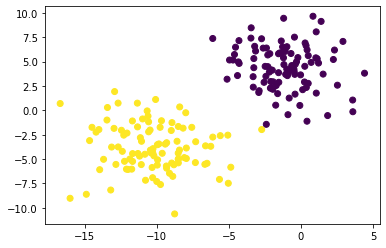

In [152]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 2, cluster_std = 2.4)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [153]:
#standaryzacja

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [154]:
# C = 1
svm_c1 = SVC(kernel='linear', C=1., random_state=0)
svm_c1.fit(X_train_std, y_train);

# C = 0.01
svm_c01 = SVC(kernel='linear', C=0.01, random_state=0)
svm_c01.fit(X_train_std, y_train);

# C = 10
svm_c10 = SVC(kernel='linear', C=10, random_state=0)
svm_c10.fit(X_train_std, y_train);

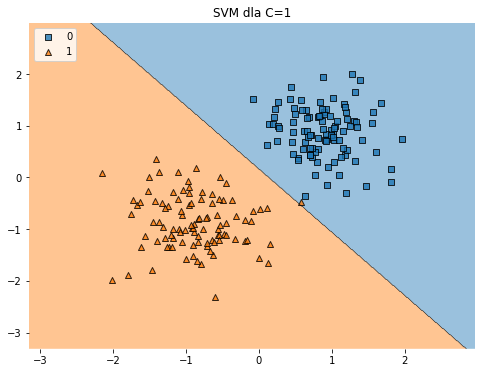

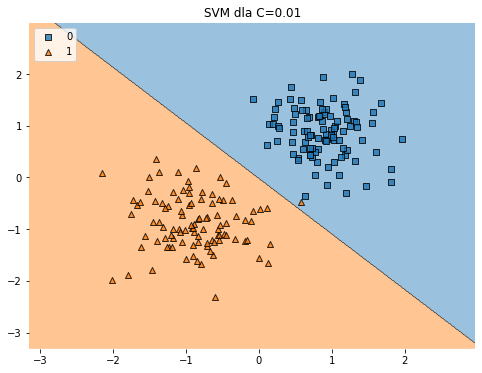

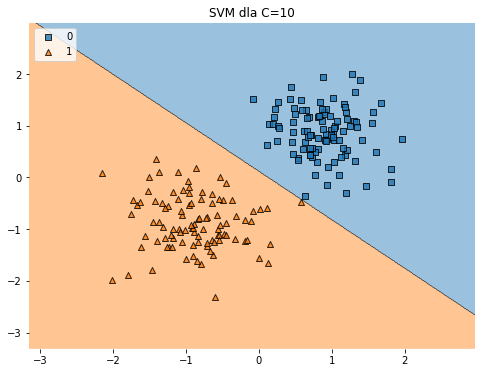

In [155]:
plt.figure(figsize=(8, 6))

X_all = np.vstack( (X_train_std, X_test_std) )
y_all = np.hstack( (y_train, y_test) )

# C = 1
plot_decision_regions(X=X_all, y=y_all, clf=svm_c1)
plt.legend(loc='upper left')
plt.title('SVM dla C=1')
plt.show()

# C = 0.01
plt.figure(figsize=(8, 6))
plot_decision_regions(X=X_all, y=y_all, clf=svm_c01)
plt.legend(loc='upper left')
plt.title('SVM dla C=0.01')
plt.show()

# C = 10
plt.figure(figsize=(8, 6))
plot_decision_regions(X=X_all, y=y_all, clf=svm_c10)
plt.legend(loc='upper left')
plt.title('SVM dla C=10')
plt.show()

In [156]:
svm_c1.score(X_test_std, y_test) #dokladnosc przy C = 1

1.0

In [157]:
svm_c01.score(X_test_std, y_test) #dokladnosc przy C = 0.01

1.0

In [158]:
svm_c10.score(X_test_std, y_test) #dokladnosc przy C = 10

1.0

ZADANIE 2

In [159]:
# gamma 0.01
svm_g01 = SVC(kernel='rbf', C=1., gamma=0.1, random_state=0)
svm_g01.fit(X_train_std, y_train)

# gamma 10
svm_g10 = SVC(kernel='rbf', C=1., gamma=10, random_state=0)
svm_g10.fit(X_train_std, y_train)

# gamma 50
svm_g50 = SVC(kernel='rbf', C=1., gamma=50, random_state=0)
svm_g50.fit(X_train_std, y_train)

SVC(gamma=50, random_state=0)

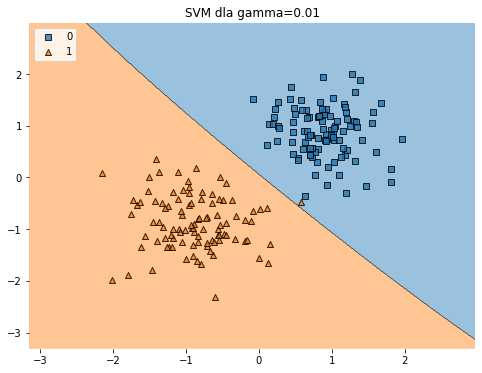

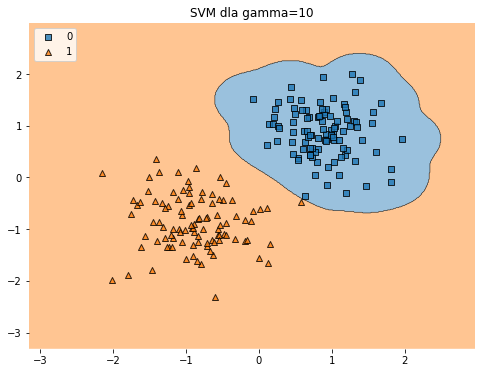

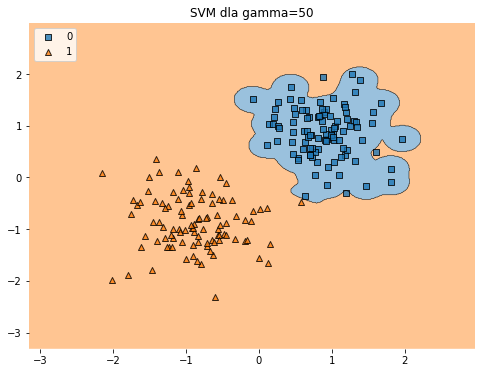

In [160]:
plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm_g01)
plt.legend(loc='upper left')
plt.title('SVM dla gamma=0.01')
plt.show()

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm_g10)
plt.legend(loc='upper left')
plt.title('SVM dla gamma=10')
plt.show()

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm_g50)
plt.legend(loc='upper left')
plt.title('SVM dla gamma=50')
plt.show()

ZADANIE 3

In [161]:
import torch

In [162]:
from utils import visualize_optimizer

In [163]:
from checker import test_optimizer

In [164]:
from typing import List

class Optimizer:
    """Base class for each optimizer"""
    
    def __init__(self, initial_params):
        # store model weights
        self.params = initial_params
    
    def step(self):
        """Updates the weights stored in self.params"""
        raise NotImplementedError()
         
    def zero_grad(self):
        """Torch accumulates gradients, so we need to clear them after every update"""
        for param in self.params:
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

In [165]:
# metoda spadku gradientu

class GradientDescent(Optimizer):
    
    def __init__(self, initial_params: List[torch.tensor], learning_rate):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
    
    @torch.no_grad()
    def step(self):
        for param in self.params:
            # Please note that it's important to change the parameters in-place (-=) so the original tensors are modified
            param -= self.learning_rate * param.grad

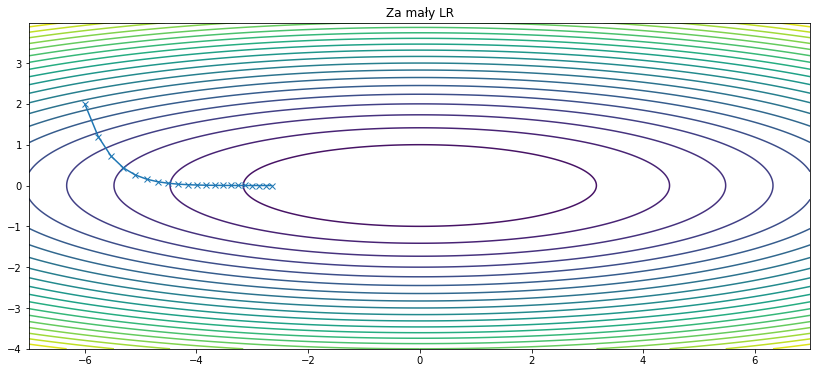

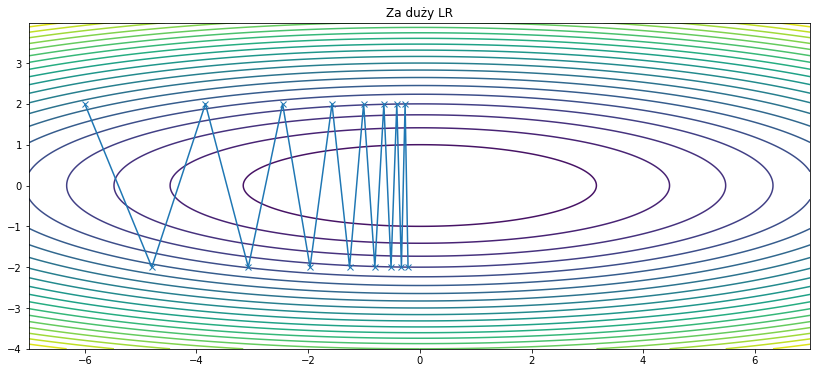

In [166]:
visualize_optimizer(GradientDescent, n_steps=20, learning_rate=0.1, title='Za mały LR')
visualize_optimizer(GradientDescent, n_steps=15, learning_rate=0.5, title='Za duży LR')

In [167]:
class Momentum(Optimizer):
    
    def __init__(self, initial_params, learning_rate, gamma):
        super().__init__(initial_params)
        
        self.learning_rate = learning_rate
        self.gamma = gamma
        
        self.deltas = []
        
        for param in self.params:
            self.deltas.append(torch.zeros_like(param))
              
    @torch.no_grad()
    def step(self):  
        for param in self.params:
            
            for delta in self.deltas:
                delta += (self.learning_rate * param.grade)/self.gamma
            
            param -= self.deltas

In [168]:
visualize_optimizer(Momentum, n_steps=20, learning_rate=0.05, gamma=0.8)


AttributeError: 'Tensor' object has no attribute 'grade'

ZADANIE 4

In [169]:
class Adagrad(Optimizer):
    
    def __init__(self, initial_params, learning_rate, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        
        self.G = 0
        
        for i in range(len(self.params)):
            self.G += (torch.pow(param.grad[i], 2)
    
    @torch.no_grad()
    def step(self):
        for param in self.params:
            param -= np.multiply(self.learning_rate/torch.sqrt(self.G + self.epsilon), param.grad)

SyntaxError: invalid syntax (<ipython-input-169-5ffc31780bc6>, line 14)

In [170]:
test_optimizer(Adagrad)

AssertionError: 

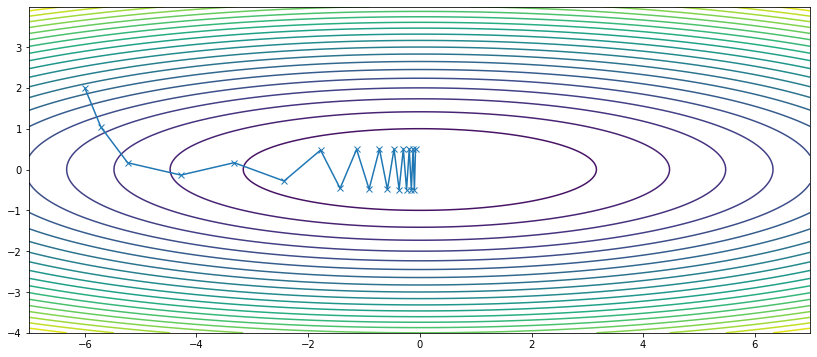

In [171]:
visualize_optimizer(Adagrad, n_steps=20, learning_rate=1.0, epsilon=1e-8)


ZADANIE 5

In [172]:
class RMSProp(Optimizer):
    
    def __init__(self, initial_params, learning_rate, gamma, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        
        self.H = []
        
        for param in self.params:
            self.H.append(torch.zeros_like(param))
        
    @torch.no_grad()
    def step(self):
        for param in self.params:
           
            for H in self.H:
                H += (1-self.gamma)*torch.pow(param.grad,2)/self.gamma
        
            param -= np.multiply(self.learning_rate/(torch.sqrt(H + self.epsilon)), param.grad)

In [173]:
test_optimizer(RMSProp)

AssertionError: 

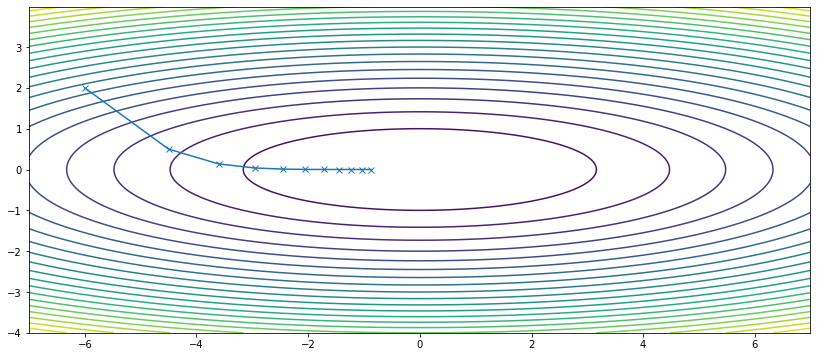

In [174]:
visualize_optimizer(RMSProp, n_steps=10, learning_rate=0.5, gamma=0.9, epsilon=1e-8)

ZADANIE 6

In [175]:
class Adadelta(Optimizer):
    def __init__(self, initial_params, gamma, epsilon):
        super().__init__(initial_params)
        self.gamma = gamma
        self.epsilon = epsilon

        self.H = []
        
        for param in self.params:
            self.H.append(torch.zeros_like(param))
        
        self.D = []
        
        for param in self.params:
            self.D.append(torch.zeros_like(param))
            
        
        
    @torch.no_grad()
    def step(self):
        for param in self.params:
            
            for H in self.H:
                H += (1-self.gamma)*torch.pow(param.grad,2)/self.gamma
                
            for D in self.D:
                D += (1-self.gamma)*torch.pow()/self.gamma #??
           
            
            
            param -= np.multiply(torch.sqrt(D + self.epsilon)/torch.sqrt(H + self.epsilon), param.grad)

In [176]:
test_optimizer(Adadelta)

TypeError: pow() received an invalid combination of arguments - got (), but expected one of:
 * (Tensor input, Tensor exponent, *, Tensor out)
 * (Number self, Tensor exponent, *, Tensor out)
 * (Tensor input, Number exponent, *, Tensor out)


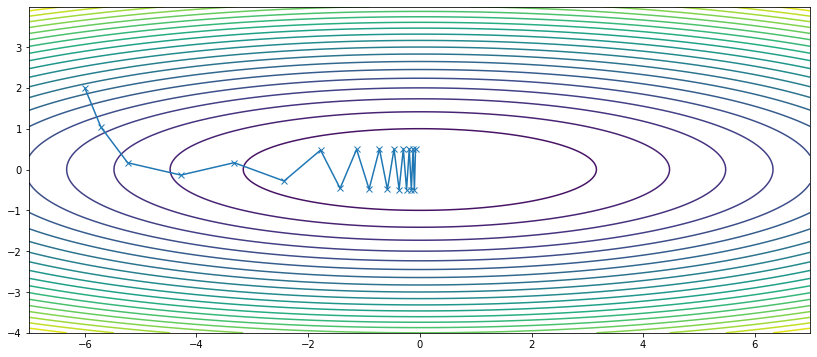

In [177]:
visualize_optimizer(Adagrad, n_steps=20, learning_rate=1.0, epsilon=1e-8)

ZADANIE 7

In [178]:
class Adam(Optimizer):
   
    def __init__(self, initial_params, learning_rate, beta1, beta2, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        
        self.m = []
        
        for param in self.params:
            self.m.append(torch.zeros_like(param))
            
        self.v = []
        
        for param in self.params:
            self.v.append(torch.zeros_like(param))
        
    @torch.no_grad()
    def step(self,):
        for param in self.params:
            
            for m in self.m:
                m += (1-self.beta1)*param.grad/ self.beta1
            for v in self.v:
                v += (1-self.beta2)*torch.pow(param.grad, 2)/self.beta2
            
            #for i in range(self.params):
                #m_new = m/(1 - self.beta1**i) #jaka potega
                #v_new = v/(1 - self.beta2**i)
                
            param -= self.learning_rate*m_new/(torch.sqrt(v_new) + self.epsilon)
        

In [179]:
test_optimizer(Adam)

NameError: name 'm_new' is not defined

In [180]:
visualize_optimizer(Adam, n_steps=20, learning_rate=0.35, beta1=0.9, beta2=0.999, epsilon=1e-8)


NameError: name 'm_new' is not defined

In [181]:
#Operacje na tensorach
x = torch.tensor([4, 9])
print(torch.sqrt(x)) #pierwiastki
print()
print(torch.pow(x, 2)) #potęgi

tensor([2., 3.])

tensor([16, 81])
